Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [89]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

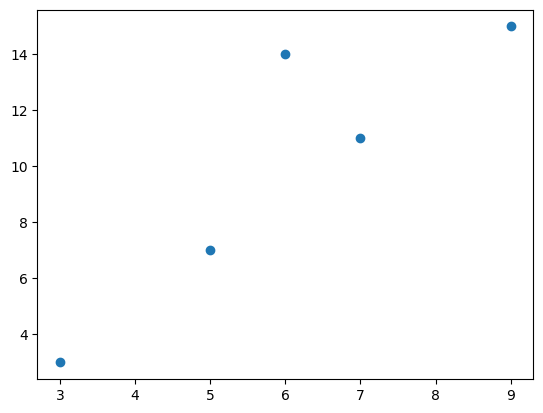

In [91]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [92]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [93]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


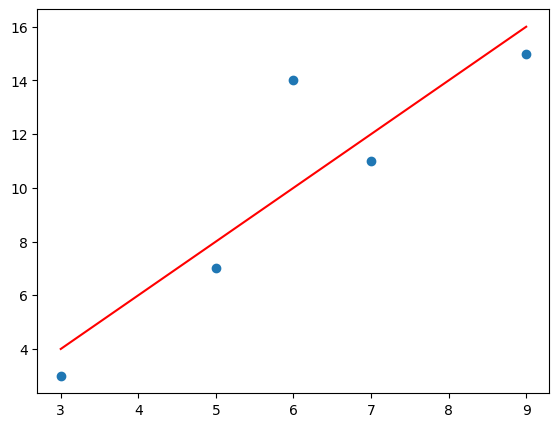

In [94]:
#Изобразим на графике исходные данные и прогнозы
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [95]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [96]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


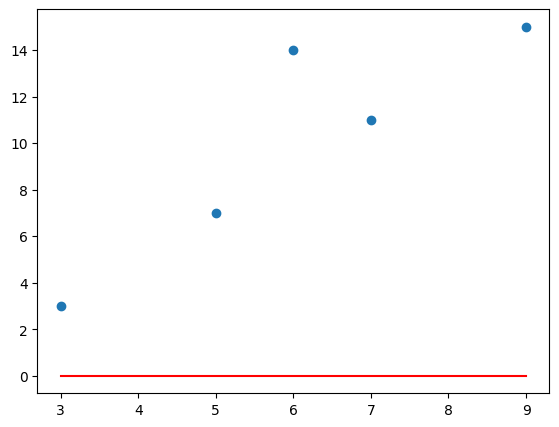

In [97]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


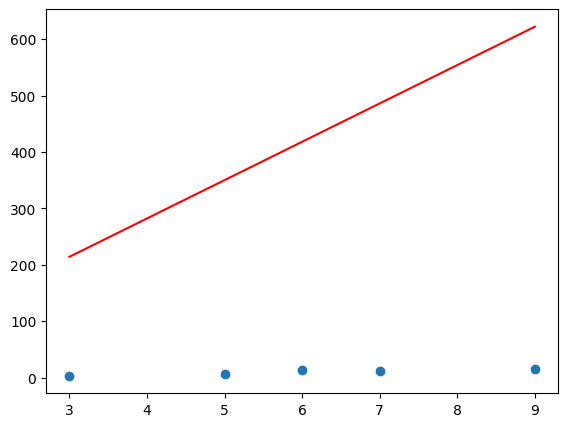

In [98]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [99]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [100]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)

5.004697916218
8.190462542210001
11.376227168202002
9.783344855206002
14.561991794194002
MSE после градиентного спуска:  4.709918696051655


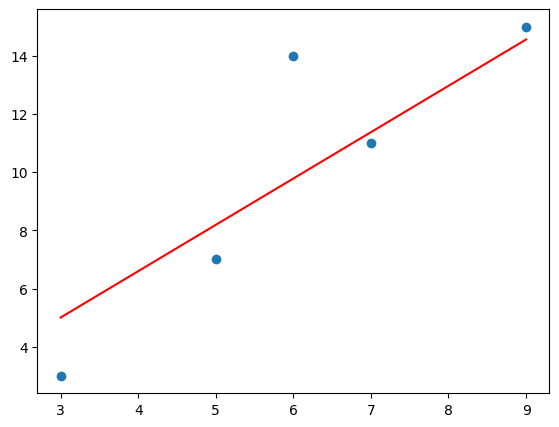

In [101]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

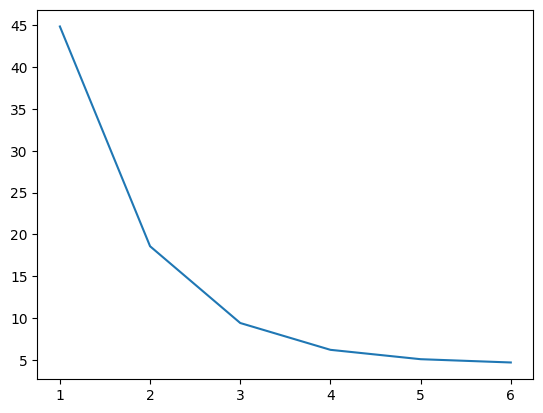

In [102]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [103]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.000028517306817


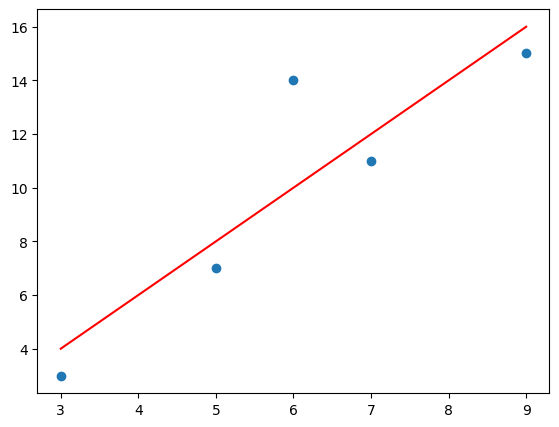

In [104]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

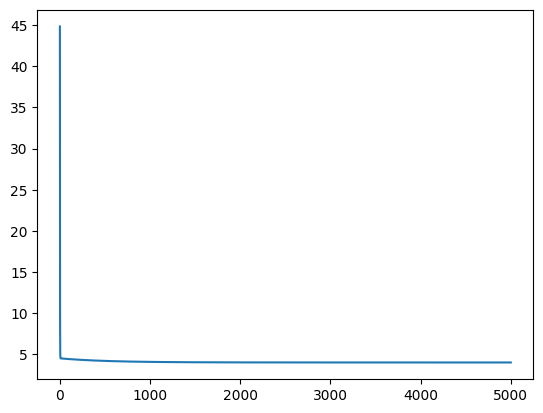

In [105]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.1903709155046345


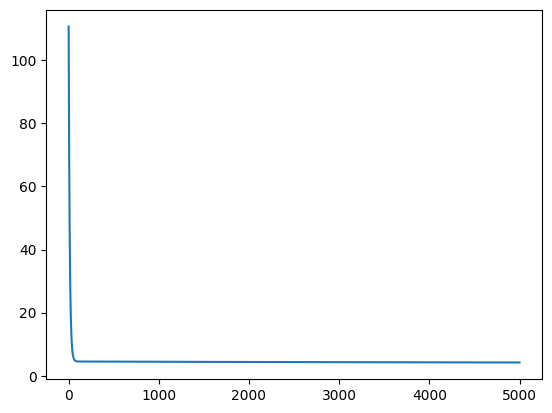

In [106]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ...,
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Гиперспектр кукурузы.csv (с помощью pd.read_csv).

1. Вычислите аналитическим путем оценки коэффициентов парной линейной регрессии и постройте ее график.
2. Найдите оценки параметров модели парной лиенйной регрессии с использованием метода градиентного спуска. Постройте график.
3. Оцените качество построенных моделей сравнив на графике обучающую выборку и прогнозы.


In [107]:
gipers = pd.read_csv(r"Гиперспектр кукурузы.csv")
gipers.head()

,,wavelength;Spectr
397,32;0,2.0
399,54;0,3.0
401,76;0,3.0
403,98;0,5.0
406,2;0,5.0


Аналитическое решение (Задание 1):
Коэффициент β0 (пересечение) = -0.1816
Коэффициент β1 (наклон) = 0.0007


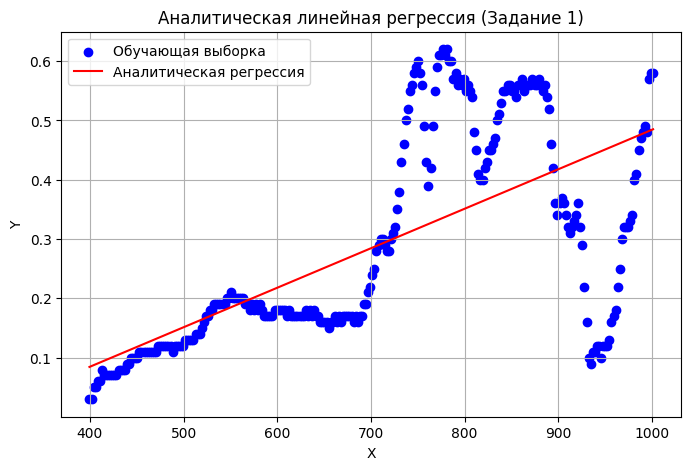

In [108]:
# Задание 1: Вычисление коэффициентов парной линейной регрессии аналитическим путем
# Загрузка данных из файла CSV с разделителем ";" и пропуском первой строки
df = pd.read_csv("Гиперспектр кукурузы.csv", sep=";", skiprows=1)

# Извлечение столбцов X и Y, преобразование строк в числа (замена запятых на точки)
x = df.iloc[:, 0].astype(str).str.replace(",", ".").astype(float).values
y = df.iloc[:, 1].astype(str).str.replace(",", ".").astype(float).values

# Вычисление средних значений X и Y для аналитической формулы
x_mean = np.mean(x)
y_mean = np.mean(y)

# Аналитическое вычисление коэффициентов β1 (наклон) и β0 (пересечение)
# Формула: β1 = Σ((x - x_mean)(y - y_mean)) / Σ((x - x_mean)^2)
beta1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
beta0 = y_mean - beta1 * x_mean

# Вывод оценок коэффициентов
print("Аналитическое решение (Задание 1):")
print(f"Коэффициент β0 (пересечение) = {beta0:.4f}")
print(f"Коэффициент β1 (наклон) = {beta1:.4f}")

# Построение графика данных и линии регрессии
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", label="Обучающая выборка")
plt.plot(x, beta0 + beta1*x, color="red", label="Аналитическая регрессия")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.title("Аналитическая линейная регрессия (Задание 1)")
plt.show()

Градиентный спуск (Задание 2):
Коэффициент β0 (пересечение) = 0.2795
Коэффициент β1 (наклон) = 0.1139


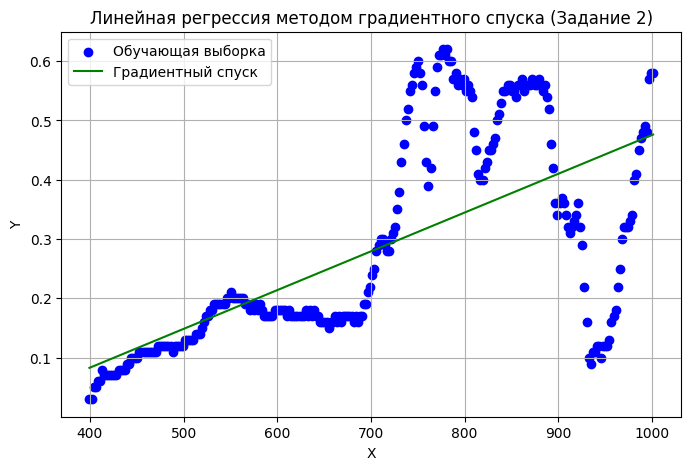

In [109]:
# Задание 2: Оценка параметров линейной регрессии методом градиентного спуска
df = pd.read_csv("Гиперспектр кукурузы.csv", sep=";", skiprows=1)

# Извлечение столбцов X и Y, преобразование строк в числа
x = df.iloc[:, 0].astype(str).str.replace(",", ".").astype(float).values
y = df.iloc[:, 1].astype(str).str.replace(",", ".").astype(float).values

# Нормализация X для стабилизации градиентного спуска
x_norm = (x - np.mean(x)) / np.std(x)

# Инициализация начальных коэффициентов и гиперпараметров
b0, b1 = 0.0, 0.0  # Начальные значения β0 и β1
alpha = 1e-4  # Скорость обучения
epochs = 20000  # Количество итераций
n = len(x_norm)  # Размер выборки

# Градиентный спуск для оптимизации коэффициентов β0 и β1
for _ in range(epochs):
    y_pred = b0 + b1 * x_norm  # Предсказание модели
    d_b0 = (-2/n) * np.sum(y - y_pred)  # Градиент для β0
    d_b1 = (-2/n) * np.sum(x_norm * (y - y_pred))  # Градиент для β1
    b0 -= alpha * d_b0  # Обновление β0
    b1 -= alpha * d_b1  # Обновление β1

# Вывод оценок коэффициентов
print("Градиентный спуск (Задание 2):")
print(f"Коэффициент β0 (пересечение) = {b0:.4f}")
print(f"Коэффициент β1 (наклон) = {b1:.4f}")

# Построение графика данных и линии регрессии
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", label="Обучающая выборка")
plt.plot(x, b0 + b1*((x - np.mean(x)) / np.std(x)), color="green", label="Градиентный спуск")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.title("Линейная регрессия методом градиентного спуска (Задание 2)")
plt.show()

Аналитическая модель (Задание 3):
MSE = 0.0177
R² = 0.4317

Градиентный спуск (Задание 3):
MSE = 0.0178
R² = 0.4307


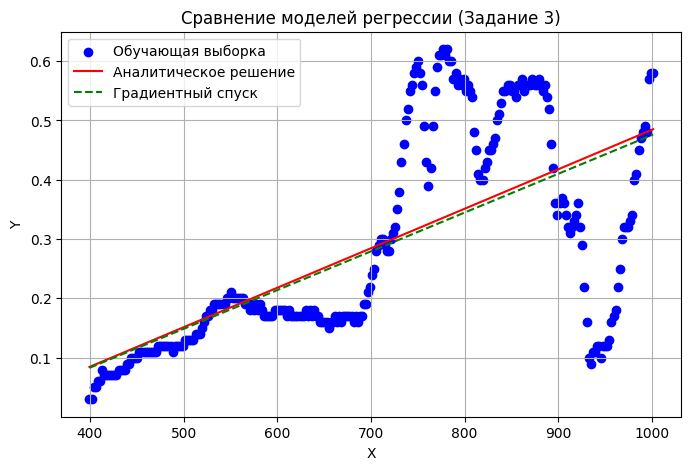

In [110]:
# Задание 3: Оценка качества моделей и сравнение на графике
df = pd.read_csv("Гиперспектр кукурузы.csv", sep=";", skiprows=1)

# Извлечение столбцов X и Y, преобразование строк в числа
x = df.iloc[:, 0].astype(str).str.replace(",", ".").astype(float).values
y = df.iloc[:, 1].astype(str).str.replace(",", ".").astype(float).values

# Аналитическое решение (из Задания 1)
x_mean = np.mean(x)
y_mean = np.mean(y)
beta1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
beta0 = y_mean - beta1 * x_mean

# Градиентный спуск (из Задания 2)
x_norm = (x - np.mean(x)) / np.std(x)
b0, b1 = 0.0, 0.0
alpha = 1e-4
epochs = 20000
n = len(x_norm)
for _ in range(epochs):
    y_pred = b0 + b1 * x_norm
    d_b0 = (-2/n) * np.sum(y - y_pred)
    d_b1 = (-2/n) * np.sum(x_norm * (y - y_pred))
    b0 -= alpha * d_b0
    b1 -= alpha * d_b1

# Предсказания для обеих моделей
y_pred_analytic = beta0 + beta1*x
y_pred_gd = b0 + b1*((x - np.mean(x)) / np.std(x))

# Функции для оценки качества моделей
def mse(y_true, y_pred):
    # Среднеквадратичная ошибка (MSE)
    return np.mean((y_true - y_pred)**2)

def r2(y_true, y_pred):
    # Коэффициент детерминации (R²)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

# Вывод метрик качества для аналитической модели
print("Аналитическая модель (Задание 3):")
print(f"MSE = {mse(y, y_pred_analytic):.4f}")
print(f"R² = {r2(y, y_pred_analytic):.4f}")

# Вывод метрик качества для модели градиентного спуска
print("\nГрадиентный спуск (Задание 3):")
print(f"MSE = {mse(y, y_pred_gd):.4f}")
print(f"R² = {r2(y, y_pred_gd):.4f}")

# Сравнение моделей на графике
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", label="Обучающая выборка")
plt.plot(x, y_pred_analytic, color="red", label="Аналитическое решение")
plt.plot(x, y_pred_gd, color="green", linestyle="--", label="Градиентный спуск")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.title("Сравнение моделей регрессии (Задание 3)")
plt.show()